In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import time
from PIL import Image
import coco
import utils
import model as modellib
from IPython.display import clear_output

import visualize
%matplotlib inline
# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
    
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

# Directory to save logs and trained model MODEL_DIR = os.path.join(ROOT_DIR, "logs") # Local path to trained weights file COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5") # Download COCO trained weights from Releases if needed if not os.path.exists(COCO_MODEL_PATH): utils.download_trained_weights(COCO_MODEL_PATH) # Directory of images to run detection on IMAGE_DIR = os.path.join(ROOT_DIR, "images") class InferenceConfig(coco.CocoConfig): # Set batch size to 1 since we'll be running inference on # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU GPU_COUNT = 1
IMAGES_PER_GPU = 1
config = InferenceConfig()
config.display()


# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']


C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



Configurations:
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAINING     

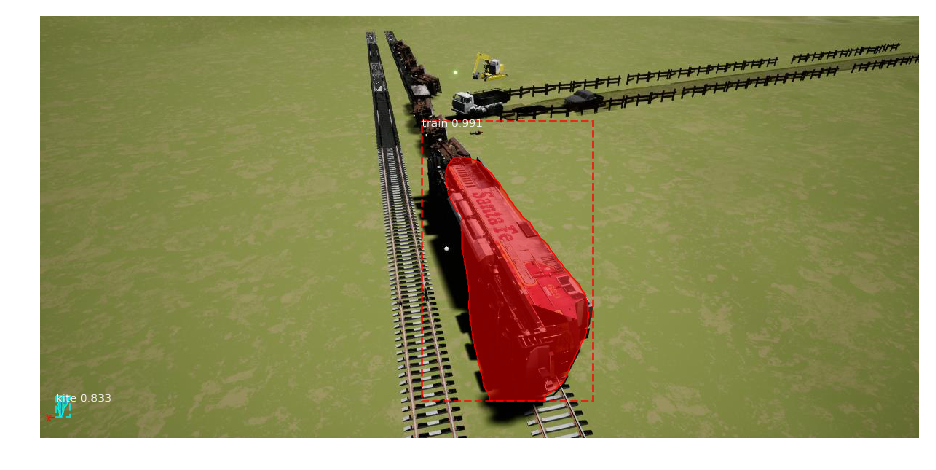

HighresScreenshot00023.jpg Stored in folder Converted_images




In [ ]:


def detect_objects():
    # COCO Class names
    # Index of the class in the list is its ID. For example, to get ID of
    # the teddy bear class, use: class_names.index('teddy bear')

    # Create model object in inference mode.
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config) # Load weights trained on MS-COCO
    model.load_weights(COCO_MODEL_PATH, by_name=True) # COCO Class names

    # Index of the class in the list is its ID. For example, to get ID of # the teddy bear class, use: class_names.index('teddy bear') class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'] # Load a list of files
    file_names = os.listdir(IMAGE_DIR)
    for image_name in file_names:
        converted_files = os.listdir(os.path.join(ROOT_DIR, "Converted_images"))
        if not ("masked_"+image_name) in converted_files:
            image = skimage.io.imread(os.path.join(IMAGE_DIR, image_name))
            #img=mpimg.imread(os.path.join(IMAGE_DIR, image_name)) 
            #imgplot = plt.imshow(img, interpolation='nearest', aspect='auto', shape = (1024,1024)) 
            #plt.show()
            # Run detection
            results = model.detect([image], verbose=1) # Visualize results
            
            clear_output()
            r = results[0]
            visualize.display_instances(image_name, image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
            #pickle.dump( r, open( "mask_results_"+image_name+".p", "wb" )) 
            #print("results available for %s"%image_name) 

from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler

class ExampleHandler(FileSystemEventHandler):
    def on_created(self, event): # when file is created
        detect_objects()
        # do something, eg. call your function to process the image
        # print ("Got event for file %s") % event.src_path 

observer = Observer()
event_handler = ExampleHandler() # create event handler
# set observer to use created handler in directory
observer.schedule(event_handler, path=IMAGE_DIR)
observer.start()
print("\nMonitoring the images folder for new images\n")

# sleep until keyboard interrupt, then stop + rejoin the observer
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    observer.stop()

observer.join()